# About Dataset

## introduction

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

You can even take this a step further and try and build a Regression model to predict Sales or Profit.


## Metadata

Row ID => Unique ID for each row.

Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.

Segment => The segment where the Customer belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.


State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.


Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product


Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.


# Data Wrangling


In [859]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,8)
%matplotlib inline

In [4]:
# to show all rows and columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')

In [6]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# to transform Order Date and Ship Date Datatypes from object to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
df.shape

(9994, 21)

In [218]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
df.duplicated().any()

False

## Orders

### Order Date

In [13]:
df['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [14]:
df['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [15]:
total_days = df['Order Date'].max() - df['Order Date'].min()
total_days

Timedelta('1457 days 00:00:00')

In [16]:
order_days = df['Order Date'].nunique()
order_days

1237

In [17]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Ship Mode

In [18]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

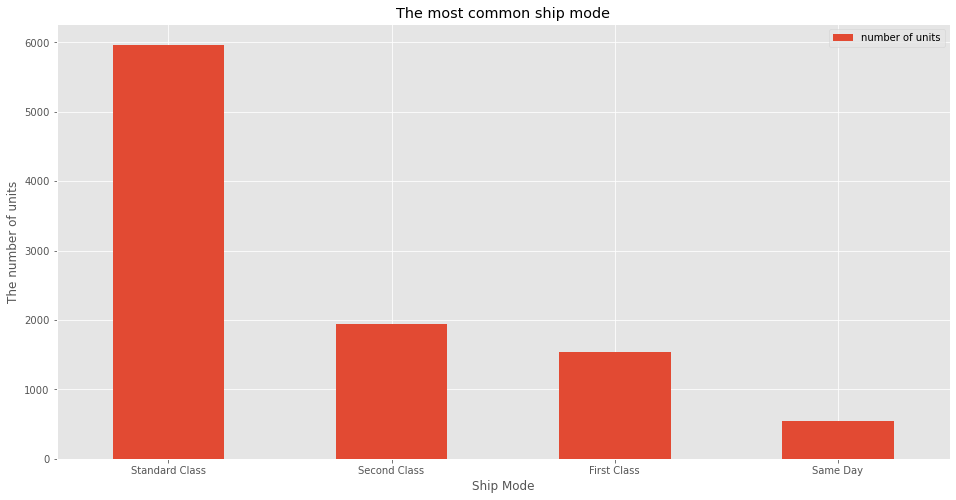

In [1004]:
plt.figure(figsize=(16,8))
df['Ship Mode'].value_counts().plot.bar()
plt.title('The most common ship mode')
plt.xlabel('Ship Mode')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

## Customer

### Segment

In [20]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

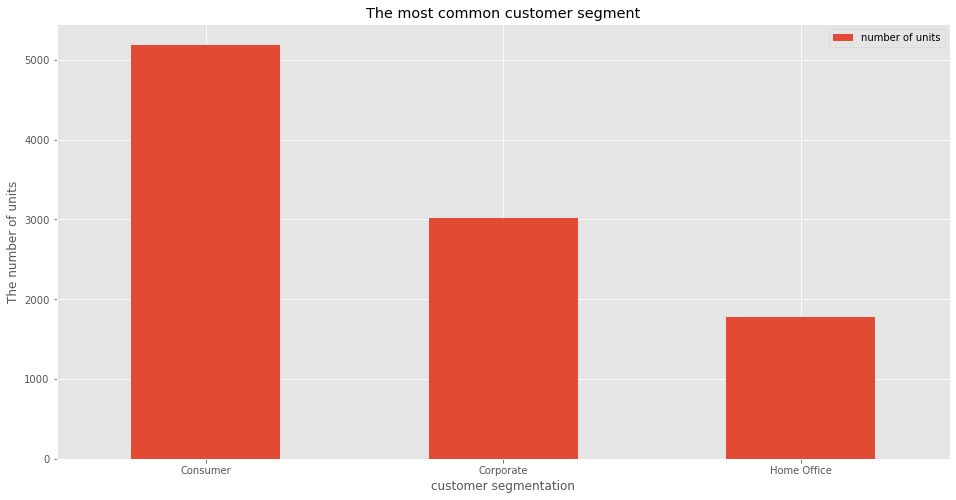

In [1003]:
plt.figure(figsize=(16,8))
df['Segment'].value_counts().plot.bar()
plt.title('The most common customer segment')
plt.xlabel('customer segmentation')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

In [200]:
pivot_table_sales = df.pivot_table(values = 'Sales' , index = 'Segment' , columns = 'Ship Mode' , aggfunc = 'sum')
pivot_table_sales

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,239038.1365


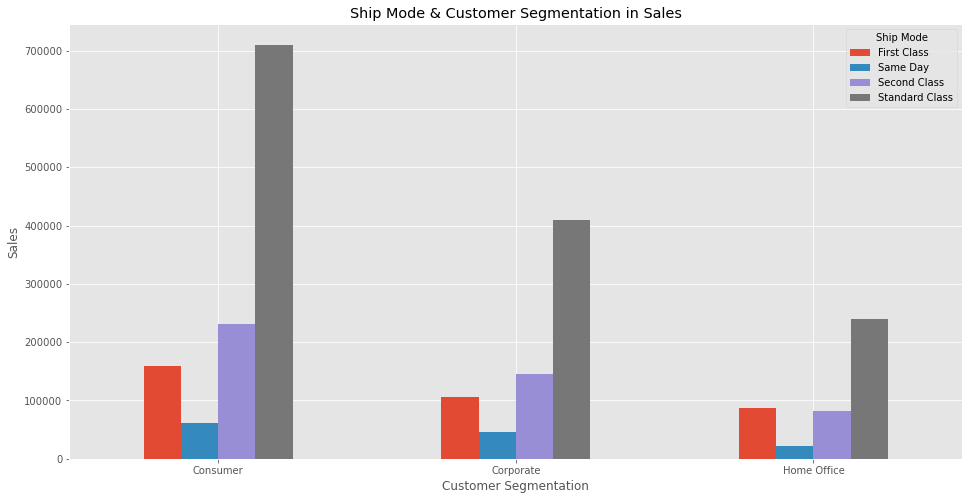

In [827]:
plt.rcParams["figure.figsize"] = (16,8)
pivot_table_sales.plot(kind = 'bar')
plt.title('Ship Mode & Customer Segmentation in Sales')
plt.xlabel('Customer Segmentation')
plt.ylabel('Sales')
plt.xticks(rotation = 360)
plt.show()

In [213]:
pivot_table_profit = df.pivot_table(values = 'Profit' , index = 'Segment' , columns = 'Ship Mode' , aggfunc = 'sum')
pivot_table_profit

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,21374.0436,9874.2054,24946.9112,77924.0490
Corporate,14464.4724,1818.1418,18225.7131,57470.8067
Home Office,13131.3239,4199.4117,14274.0111,28693.9318


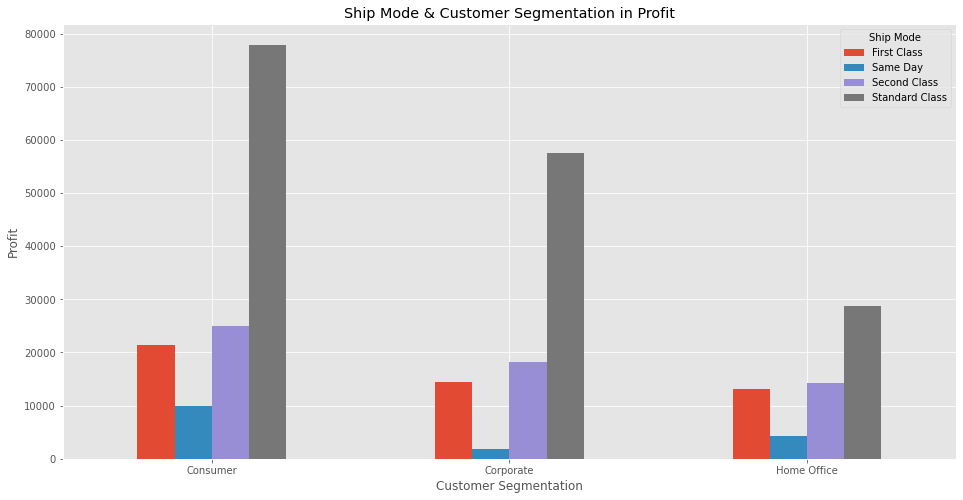

In [824]:
plt.rcParams["figure.figsize"] = (16,8)
pivot_table_profit.plot(kind = 'bar')
plt.title('Ship Mode & Customer Segmentation in Profit')
plt.xlabel('Customer Segmentation')
plt.ylabel('Profit')
plt.xticks(rotation = 360)
plt.show()

### Customer ID

In [121]:
df['Customer ID'].nunique()

793

### Customer Name

In [122]:
df['Customer Name'].nunique()

793

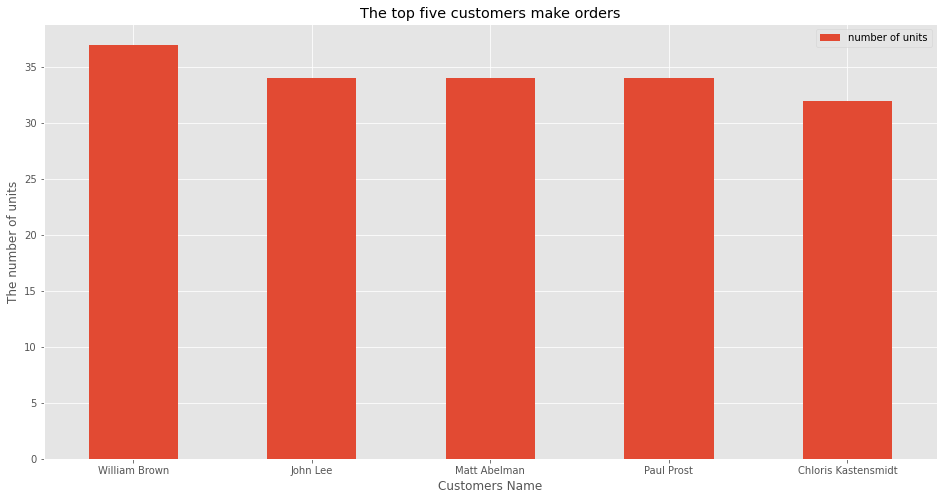

In [1002]:
Top_5_Buyers = df['Customer Name'].value_counts().nlargest(5)
plt.figure(figsize=(16,8))
Top_5_Buyers.plot(kind= 'bar')
plt.title('The top five customers make orders')
plt.xlabel('Customers Name')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

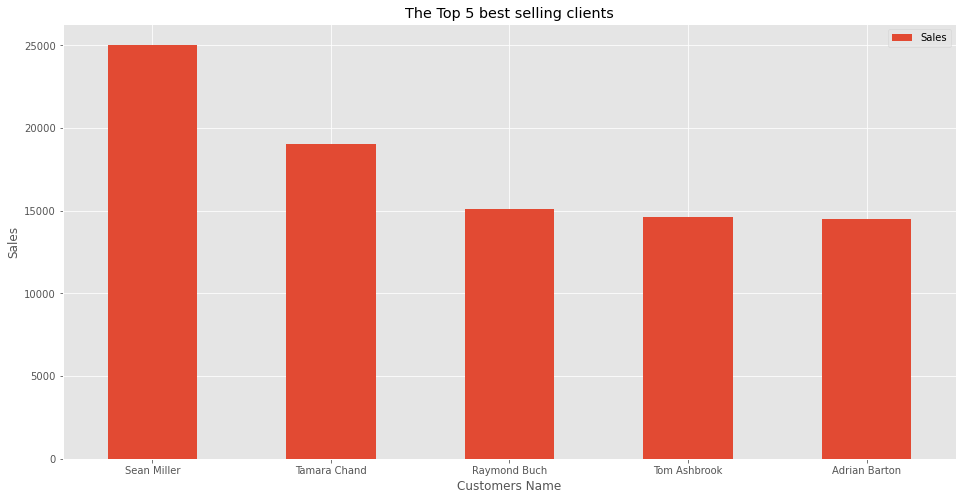

In [1001]:
best_5_selling_clients = df.groupby(['Customer Name']).sum()['Sales'].nlargest(5)
plt.figure(figsize=(16,8))
best_5_selling_clients.plot(kind= 'bar')
plt.title('The Top 5 best selling clients')
plt.xlabel('Customers Name')
plt.ylabel('Sales')
plt.legend(['Sales'])
plt.xticks(rotation = 360)
plt.show()

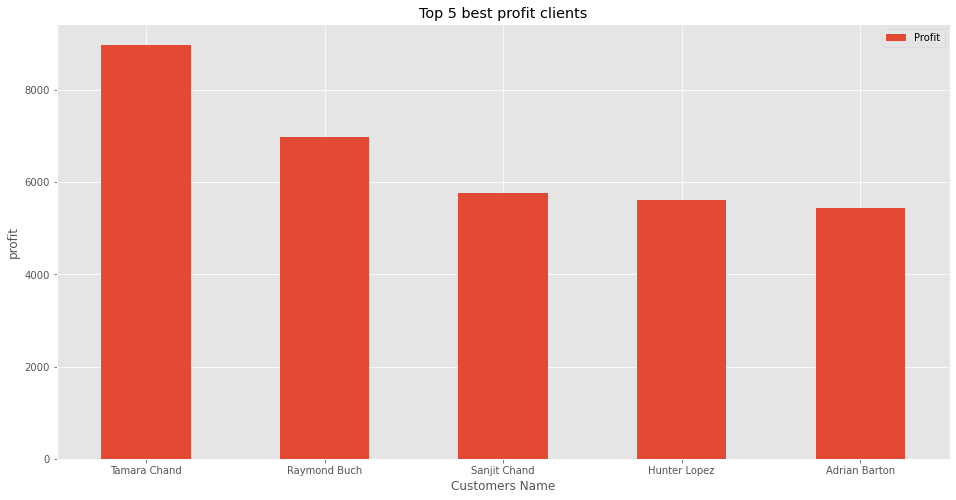

In [1000]:
best_5_profit_clients = df.groupby(['Customer Name']).sum()['Profit'].nlargest(5)
plt.figure(figsize=(16,8))
best_5_profit_clients.plot(kind= 'bar')
plt.title('Top 5 best profit clients')
plt.xlabel('Customers Name')
plt.ylabel('profit')
plt.legend(['Profit'])
plt.xticks(rotation = 360)
plt.show()

### Country

In [22]:
df['Country'].unique()

array(['United States'], dtype=object)

### City

In [23]:
df['City'].nunique()

531

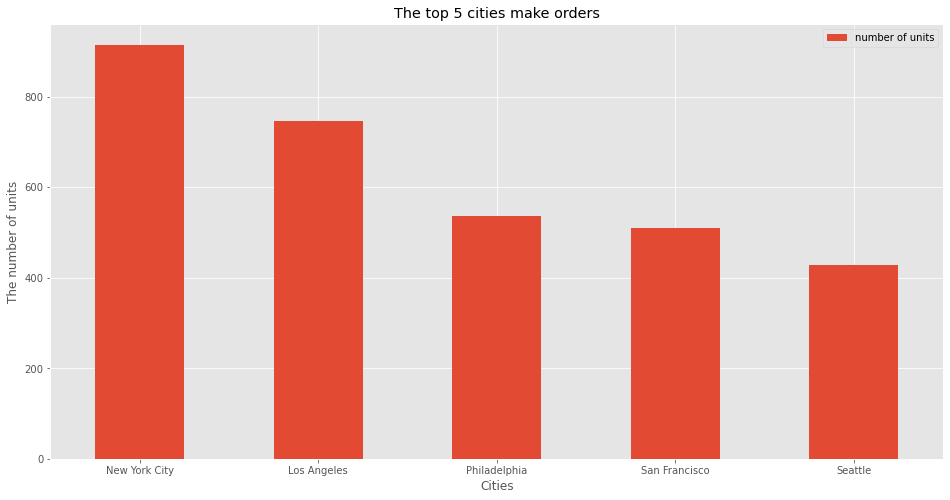

In [998]:
plt.figure(figsize=(16,8))
df['City'].value_counts().nlargest(5).plot.bar()
plt.title('The top 5 cities make orders')
plt.xlabel('Cities')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

In [848]:
group_city_sales = df.groupby('City').sum()[['Sales']]
top_group_city_sales = group_city_sales.sort_values(by = 'Sales' , ascending=False)
top_5_group_city_sales = top_group_city_sales[:5]
top_5_group_city_sales

,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013


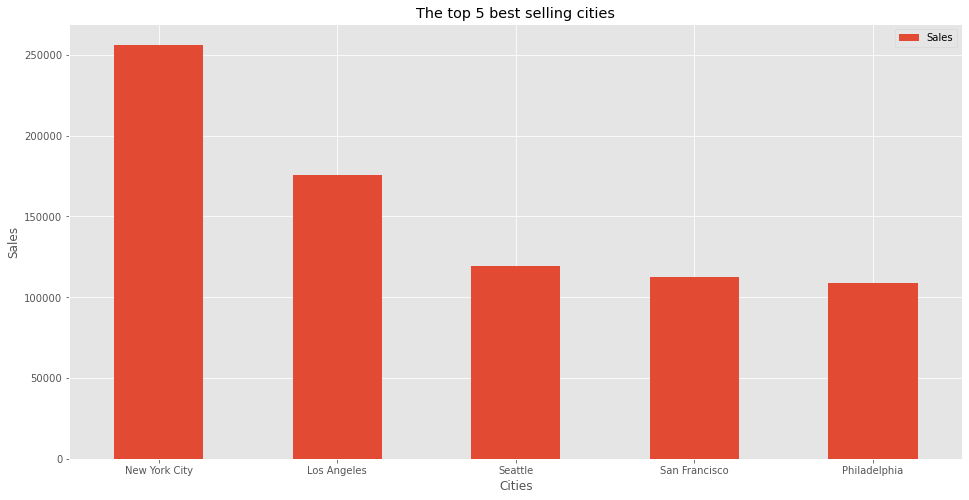

In [858]:
top_5_group_city_sales.plot.bar()
plt.title('The top 5 best selling cities')
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.xticks(rotation = 360)
plt.show()

In [851]:
group_city_profit = df.groupby('City').sum()[['Profit']]
top_group_city_profit = group_city_profit.sort_values(by = 'Profit',ascending=False)
top_5_group_city_profit = top_group_city_profit[:5]
top_5_group_city_profit

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908


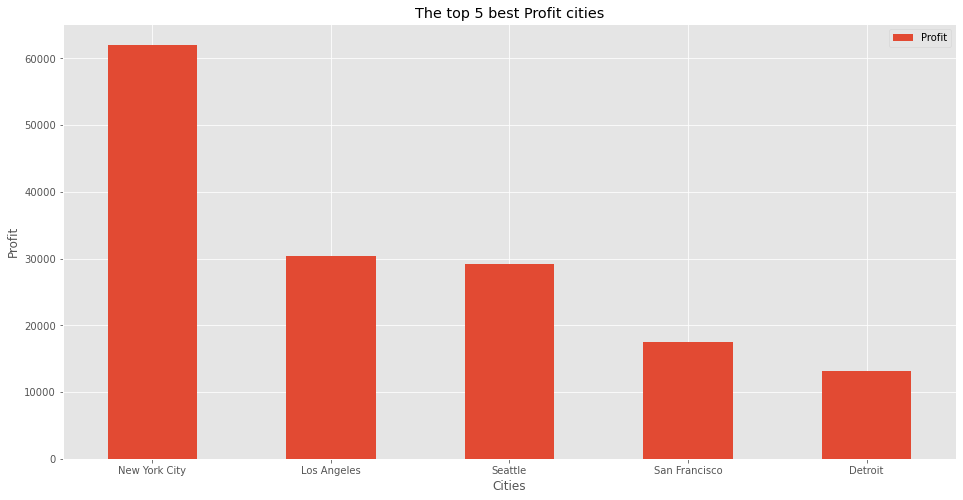

In [857]:
top_5_group_city_profit.plot.bar()
plt.title('The top 5 best Profit cities')
plt.xlabel('Cities')
plt.ylabel('Profit')
plt.xticks(rotation = 360)
plt.show()

### State

In [25]:
df['State'].nunique()

49

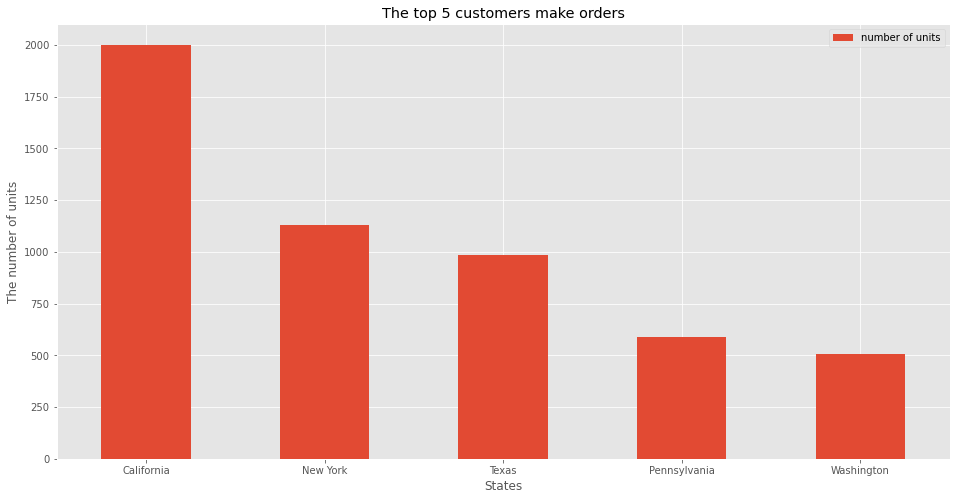

In [997]:
plt.figure(figsize=(16,8))
df['State'].value_counts().nlargest(5).plot.bar()
plt.title('The top 5 customers make orders')
plt.xlabel('States')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

In [526]:
group_state_sales = df.groupby('State').sum()[['Sales']]
top_group_state_sales = group_state_sales.sort_values(by = 'Sales' , ascending=False)
top_5_group_state_sales = top_group_state_sales[:5]
top_5_group_state_sales

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140


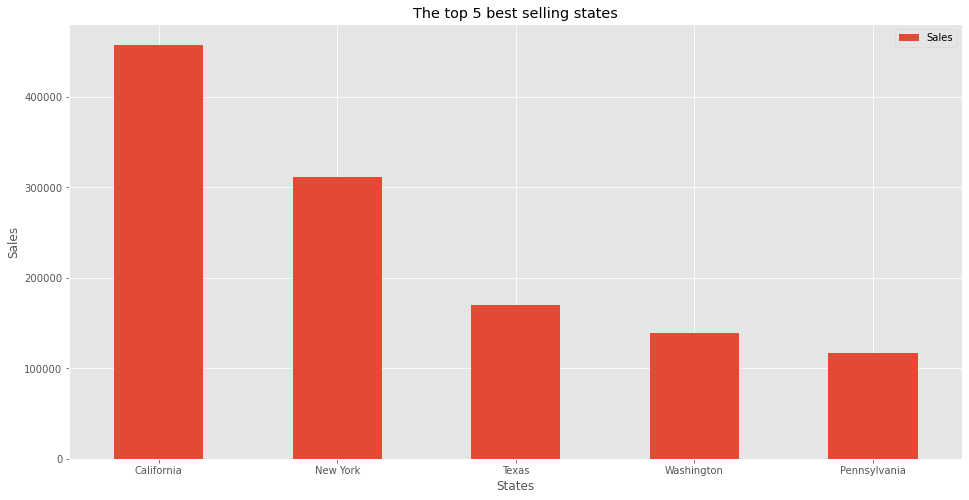

In [867]:
top_5_group_state_sales.plot.bar()
plt.title('The top 5 best selling states')
plt.xlabel('States')
plt.ylabel('Sales')
plt.xticks(rotation = 360)
plt.show()

In [860]:
group_state_profit = df.groupby('State').sum()[['Profit']]
top_group_state_profit = group_state_profit.sort_values(by = 'Profit',ascending=False)
top_5_group_state_profit = top_group_state_profit[:5]
top_5_group_state_profit

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504


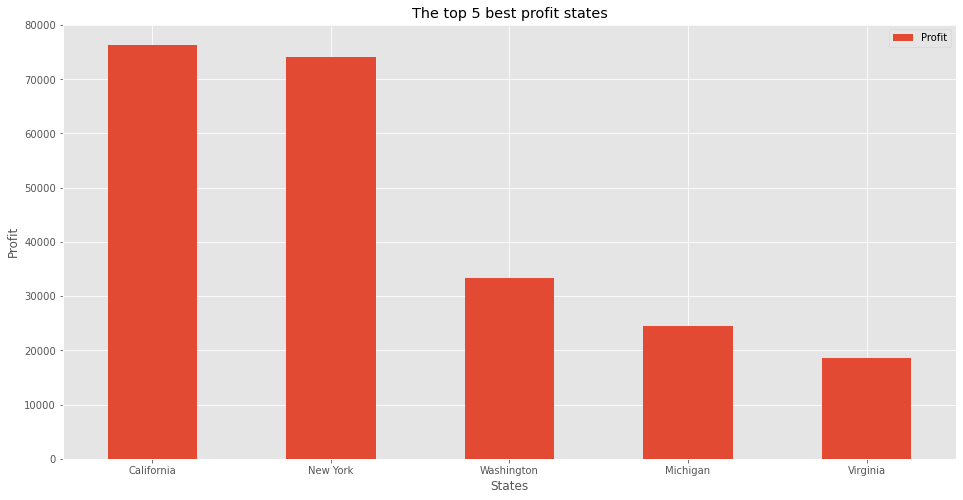

In [868]:
plt.rcParams['figure.figsize'] = (16,8)
top_5_group_state_profit.plot.bar()
plt.title('The top 5 best profit states')
plt.xlabel('States')
plt.ylabel('Profit')
plt.xticks(rotation = 360)
plt.show()

### Region

In [27]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

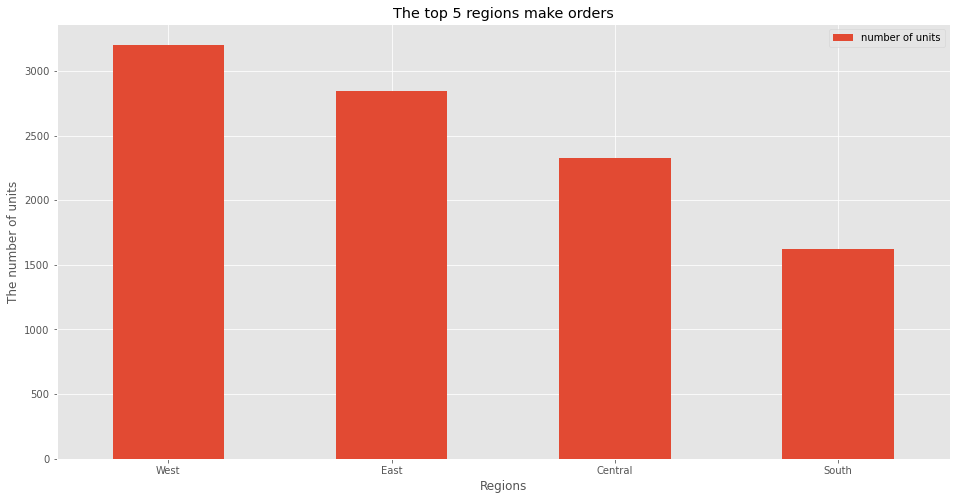

In [994]:
plt.figure(figsize=(16,8))
df['Region'].value_counts().nlargest(5).plot.bar()
plt.title('The top 5 regions make orders')
plt.xlabel('Regions')
plt.ylabel('The number of units')
plt.xticks(rotation = 360)
plt.legend(['number of units'])
plt.show()

In [872]:
group_region_sales = df.groupby('Region').sum()[['Sales']]
top_group_region_sales = group_region_sales.sort_values(by = 'Sales' , ascending=False)
top_group_region_sales

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


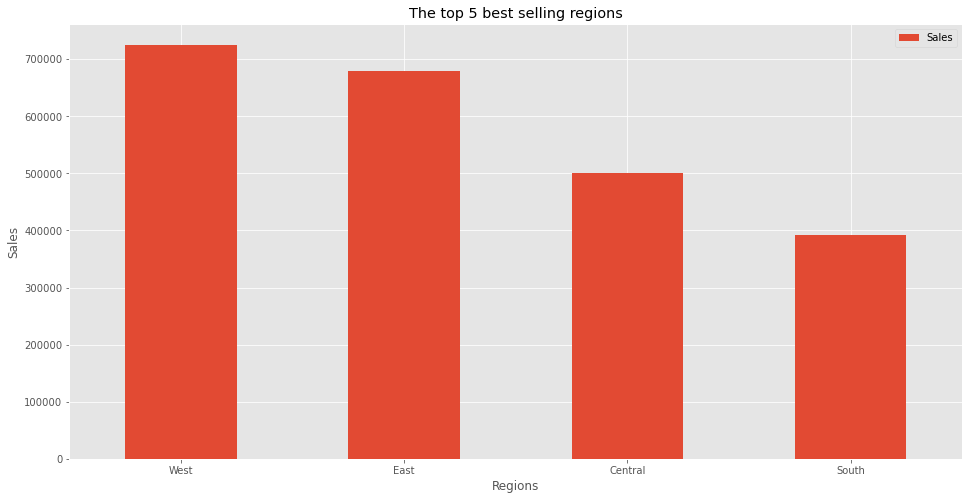

In [875]:
top_group_region_sales.plot.bar()
plt.title('The top 5 best selling regions')
plt.xlabel('Regions')
plt.ylabel('Sales')
plt.xticks(rotation = 360)
plt.show()

In [876]:
group_region_profit = df.groupby('Region').sum()[['Profit']]
top_group_region_profit = group_region_profit.sort_values(by = 'Profit' , ascending=False)
top_group_region_profit

,Profit
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39706.3625


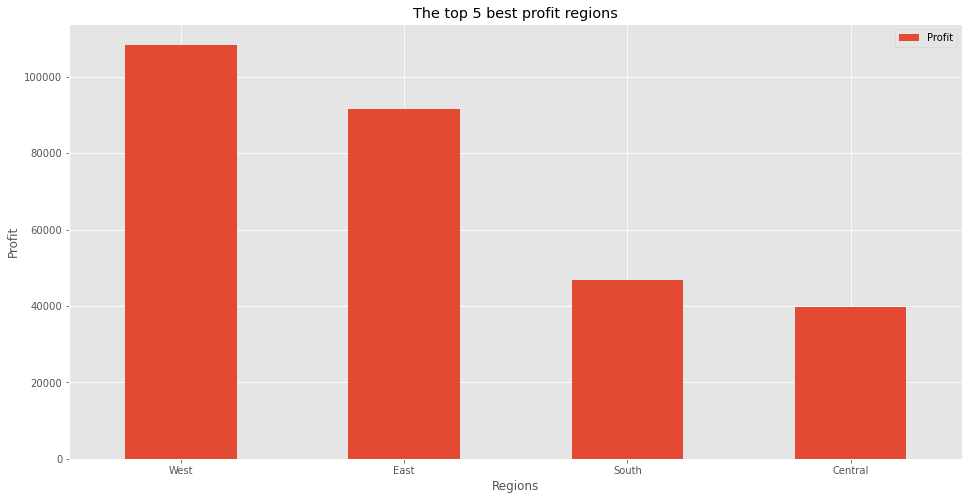

In [877]:
top_group_region_profit.plot.bar()
plt.title('The top 5 best profit regions')
plt.xlabel('Regions')
plt.ylabel('Profit')
plt.xticks(rotation = 360)
plt.show()

## Product

### Category

In [29]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

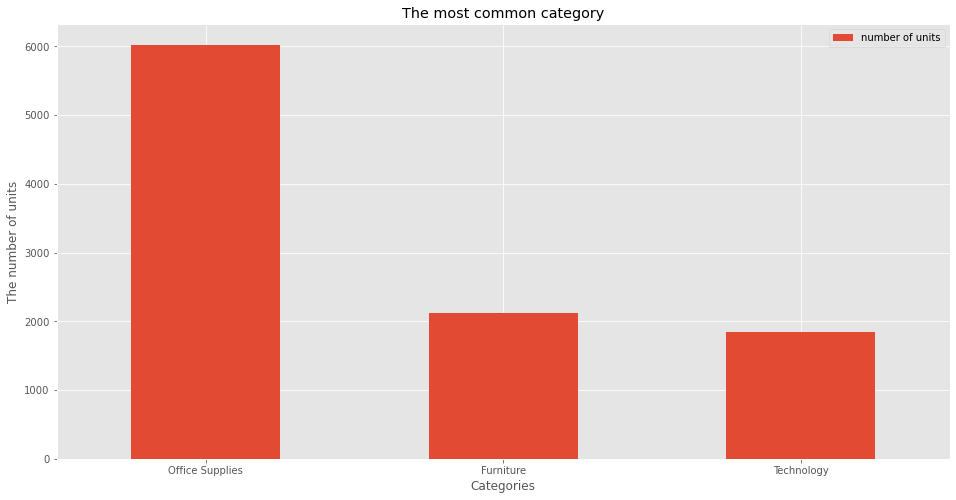

In [992]:
plt.figure(figsize=(16,8))
df['Category'].value_counts().plot.bar()
plt.title('The most common category')
plt.xlabel('Categories')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

In [521]:
sales_group_category = df.groupby(['Category']).sum()[['Sales']]
sales_group_category

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [522]:
top_sales_category = sales_group_category.sort_values(by = 'Sales',ascending = False)
top_sales_category

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


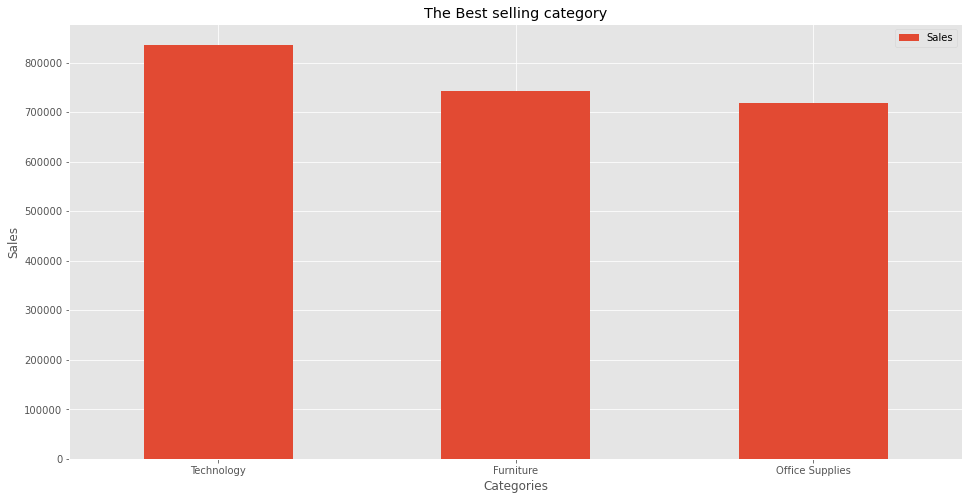

In [885]:
top_sales_category.plot(kind = 'bar')
plt.title('The Best selling category')
plt.xlabel('Categories')
plt.ylabel('Sales')
plt.xticks(rotation = 360)
plt.show()

In [517]:
profit_group_category = df.groupby(['Category']).sum()[['Profit']]
profit_group_category

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


In [518]:
top_profit_category = profit_group_category.sort_values(by = 'Profit', ascending = False)
top_profit_category

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


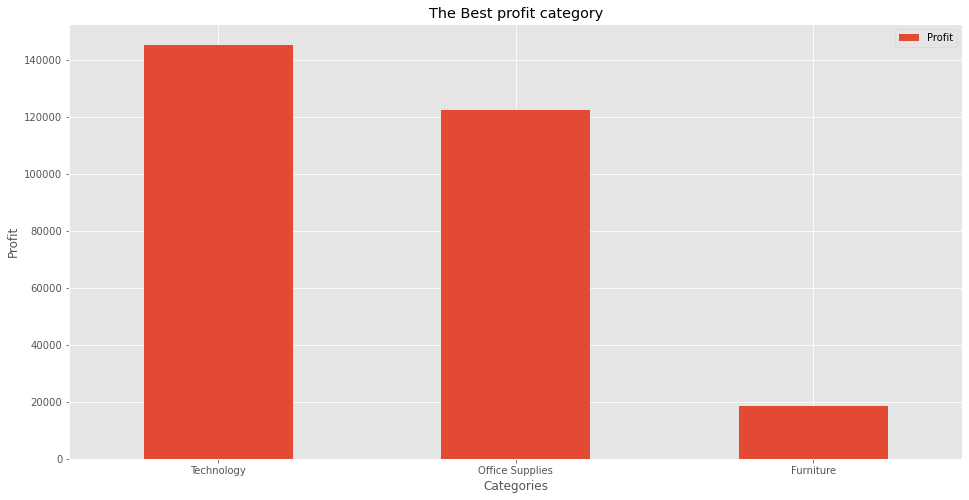

In [887]:
top_profit_category.plot(kind = 'bar')
plt.title('The Best profit category')
plt.xlabel('Categories')
plt.ylabel('Profit')
plt.xticks(rotation = 360)
plt.show()

### Sub-Category

In [31]:
df['Sub-Category'].nunique()

17

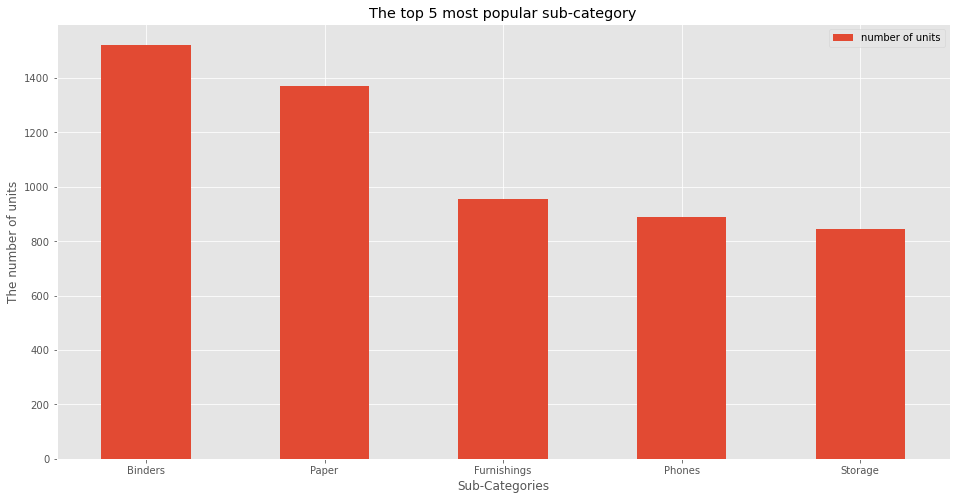

In [990]:
plt.figure(figsize=(16,8))
df['Sub-Category'].value_counts().nlargest(5).plot.bar()
plt.title('The top 5 most popular sub-category')
plt.xlabel('Sub-Categories')
plt.ylabel('The number of units')
plt.xticks(rotation = 360)
plt.legend(['number of units'] , loc='upper right')
plt.show()

In [889]:
sales_group_sub_category = df.groupby(['Sub-Category']).sum()[['Sales']]
sales_group_sub_category.head()

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27118.7920
Binders,203412.7330
Bookcases,114879.9963


In [890]:
top_sales_sub_category = sales_group_sub_category.sort_values(by = 'Sales', ascending=False)
top_sales_sub_category.head()

,Sales
Sub-Category,
Phones,330007.054
Chairs,328449.103
Storage,223843.608
Tables,206965.532
Binders,203412.733


In [891]:
top_5_sales_sub_category = top_sales_sub_category[:5]
top_5_sales_sub_category

,Sales
Sub-Category,
Phones,330007.054
Chairs,328449.103
Storage,223843.608
Tables,206965.532
Binders,203412.733


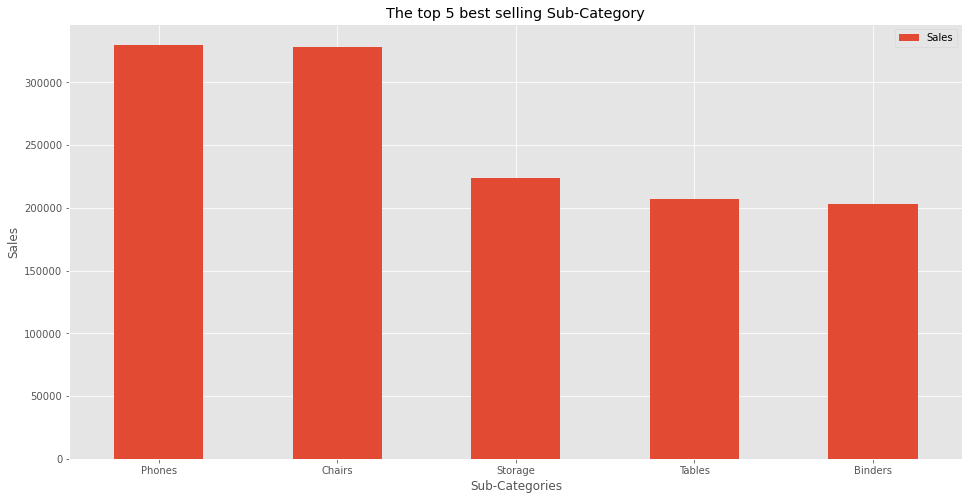

In [900]:
top_5_sales_sub_category.plot(kind = 'bar')
plt.title('The top 5 best selling Sub-Category')
plt.xlabel('Sub-Categories')
plt.ylabel('Sales')
plt.xticks(rotation = 360)
plt.show()

In [505]:
profit_group_sub_category = df.groupby(['Sub-Category']).sum()[['Profit']]
profit_group_sub_category.head()

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Bookcases,-3472.5560


In [506]:
top_profit_sub_category = profit_group_sub_category.sort_values(by = 'Profit',ascending=False)
top_profit_sub_category.head()

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633


In [507]:
top_5_profit_sub_category = top_profit_sub_category[:5]
top_5_profit_sub_category

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633


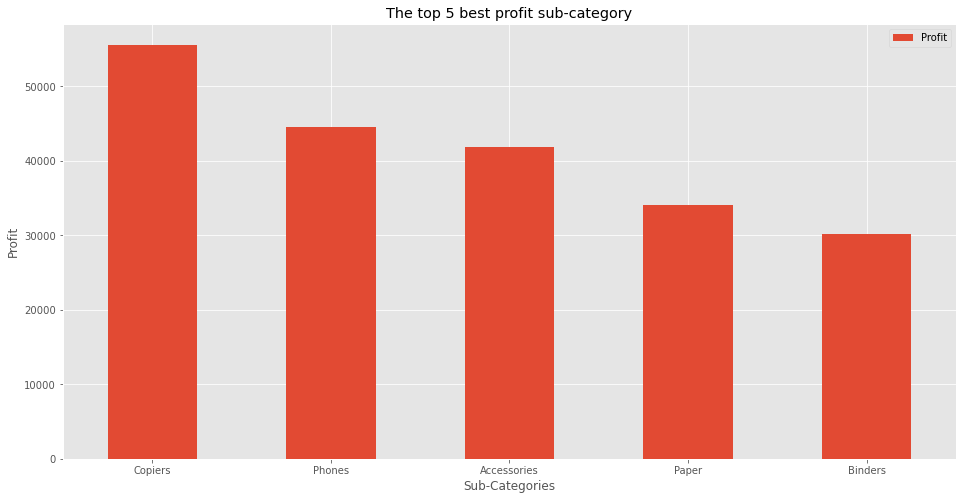

In [896]:
top_5_profit_sub_category.plot(kind = 'bar')
plt.title('The top 5 best profit sub-category')
plt.xlabel('Sub-Categories')
plt.ylabel('Profit')
plt.xticks(rotation = 360)
plt.show()

### Product Name

In [99]:
df['Product Name'].nunique()

1850

In [503]:
freq_group = df.groupby(['Product Name' , 'Sub-Category' , 'Category']).count()[['Quantity']]
top_freq = freq_group.sort_values(by = 'Quantity' , ascending=False)
top_5_freq = top_freq[:5]
top_5_freq

,,,Quantity
Product Name,Sub-Category,Category,
Staple envelope,Envelopes,Office Supplies,48
Staples,Fasteners,Office Supplies,46
Easy-staple paper,Paper,Office Supplies,46
Avery Non-Stick Binders,Binders,Office Supplies,20
Staples in misc. colors,Art,Office Supplies,19


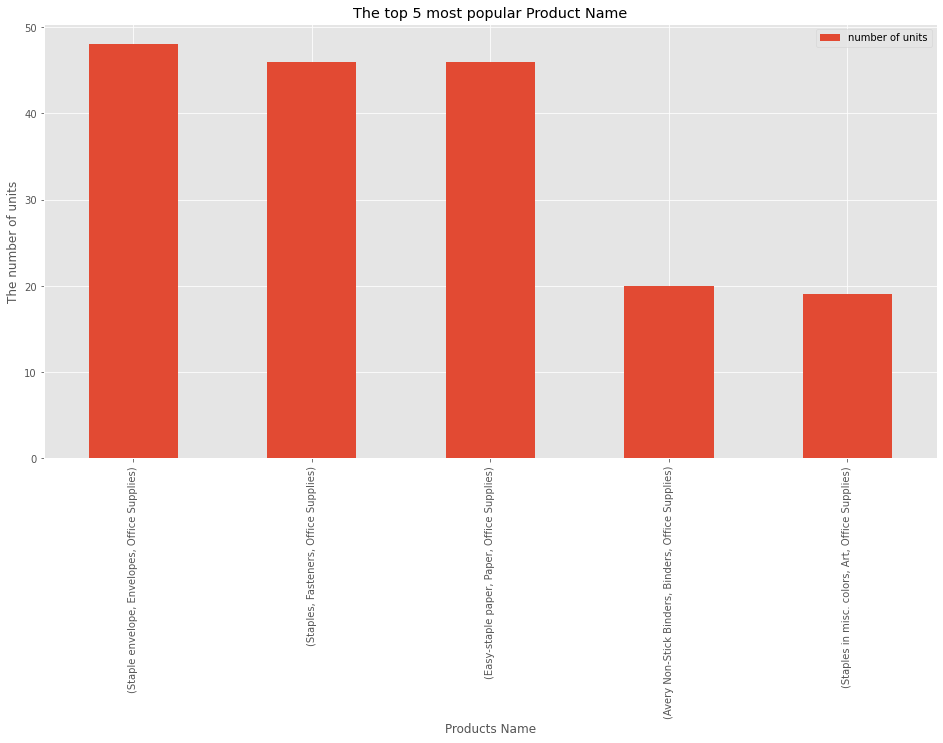

In [1010]:
top_5_freq.plot.bar()
plt.title('The top 5 most popular Product Name')
plt.xlabel('Products Name')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 90)
plt.show()

In [489]:
sales_group_prod_name = df.groupby(['Product Name' , 'Sub-Category' , 'Category']).sum()[['Sales']]
sales_group_prod_name.head()

,,,Sales
Product Name,Sub-Category,Category,
"""While you Were Out"" Message Book, One Form per Page",Paper,Office Supplies,25.228
"#10 Gummed Flap White Envelopes, 100/Box",Envelopes,Office Supplies,41.300
#10 Self-Seal White Envelopes,Envelopes,Office Supplies,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",Envelopes,Office Supplies,488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",Envelopes,Office Supplies,286.672


In [491]:
top_sales_prod_name = sales_group_prod_name.sort_values(by = 'Sales' , ascending= False)
top_sales_prod_name.head()

,,,Sales
Product Name,Sub-Category,Category,
Canon imageCLASS 2200 Advanced Copier,Copiers,Technology,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Binders,Office Supplies,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,Machines,Technology,22638.480
HON 5400 Series Task Chairs for Big and Tall,Chairs,Furniture,21870.576
GBC DocuBind TL300 Electric Binding System,Binders,Office Supplies,19823.479


In [499]:
top_5_sales_prod_name = top_sales_prod_name[:5]
top_5_sales_prod_name

,,,Sales
Product Name,Sub-Category,Category,
Canon imageCLASS 2200 Advanced Copier,Copiers,Technology,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Binders,Office Supplies,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,Machines,Technology,22638.480
HON 5400 Series Task Chairs for Big and Tall,Chairs,Furniture,21870.576
GBC DocuBind TL300 Electric Binding System,Binders,Office Supplies,19823.479


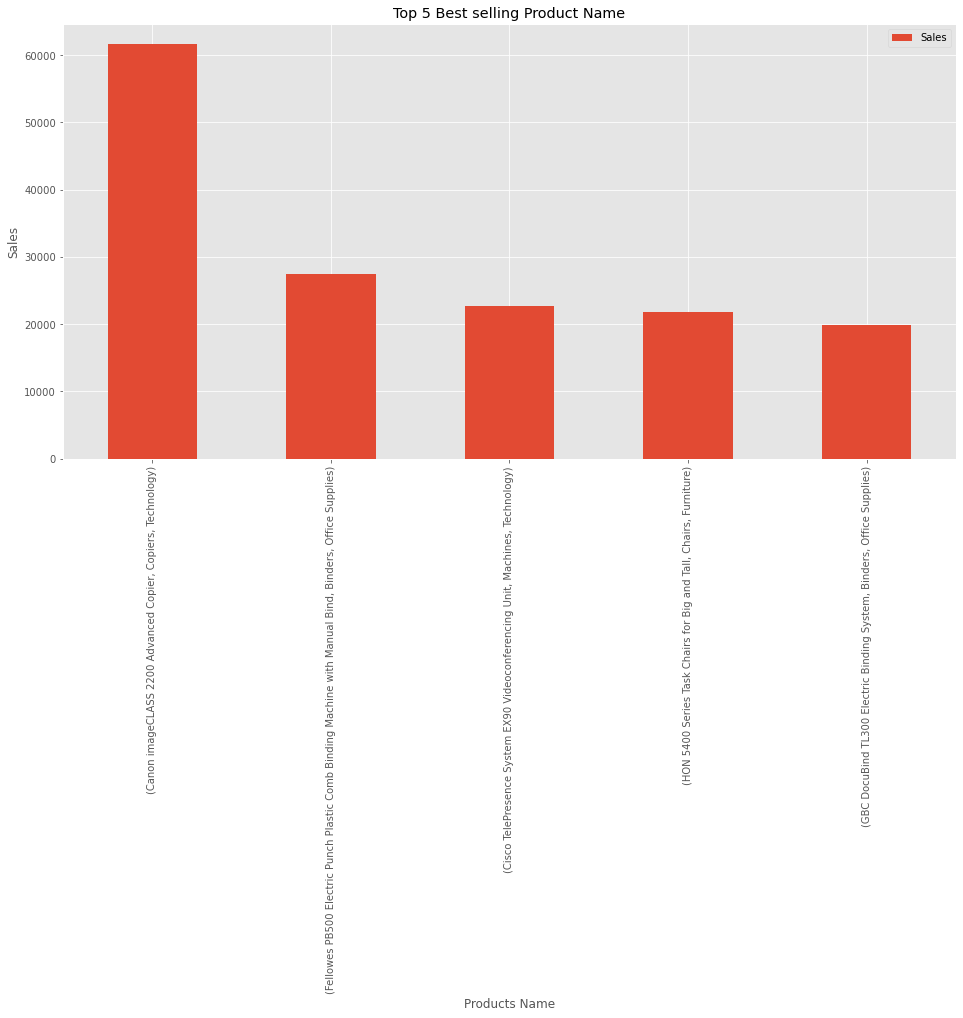

In [909]:
top_5_sales_prod_name.plot(kind = 'bar')
plt.title('Top 5 Best selling Product Name')
plt.xlabel('Products Name')
plt.ylabel('Sales')
plt.xticks(rotation = 90)
plt.show()

In [253]:
profit_group_prod_name = df.groupby(['Product Name' , 'Sub-Category' , 'Category']).sum()['Profit']
profit_group_prod_name.head()

Product Name                                          Sub-Category  Category       
"While you Were Out" Message Book, One Form per Page  Paper         Office Supplies     10.3880
#10 Gummed Flap White Envelopes, 100/Box              Envelopes     Office Supplies     16.7678
#10 Self-Seal White Envelopes                         Envelopes     Office Supplies     52.1230
#10 White Business Envelopes,4 1/8 x 9 1/2            Envelopes     Office Supplies    223.1408
#10- 4 1/8" x 9 1/2" Recycled Envelopes               Envelopes     Office Supplies    115.2806
Name: Profit, dtype: float64

In [254]:
top_profit_prod_name = profit_group_prod_name.sort_values(ascending= False)
top_profit_prod_name.head()

Product Name                                                                 Sub-Category  Category       
Canon imageCLASS 2200 Advanced Copier                                        Copiers       Technology         25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind  Binders       Office Supplies     7753.0390
Hewlett Packard LaserJet 3310 Copier                                         Copiers       Technology          6983.8836
Canon PC1060 Personal Laser Copier                                           Copiers       Technology          4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                    Machines      Technology          4094.9766
Name: Profit, dtype: float64

In [255]:
top_5_profit_prod_name = pd.DataFrame(top_profit_prod_name[:5])
top_5_profit_prod_name

,,,Profit
Product Name,Sub-Category,Category,
Canon imageCLASS 2200 Advanced Copier,Copiers,Technology,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Binders,Office Supplies,7753.0390
Hewlett Packard LaserJet 3310 Copier,Copiers,Technology,6983.8836
Canon PC1060 Personal Laser Copier,Copiers,Technology,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",Machines,Technology,4094.9766


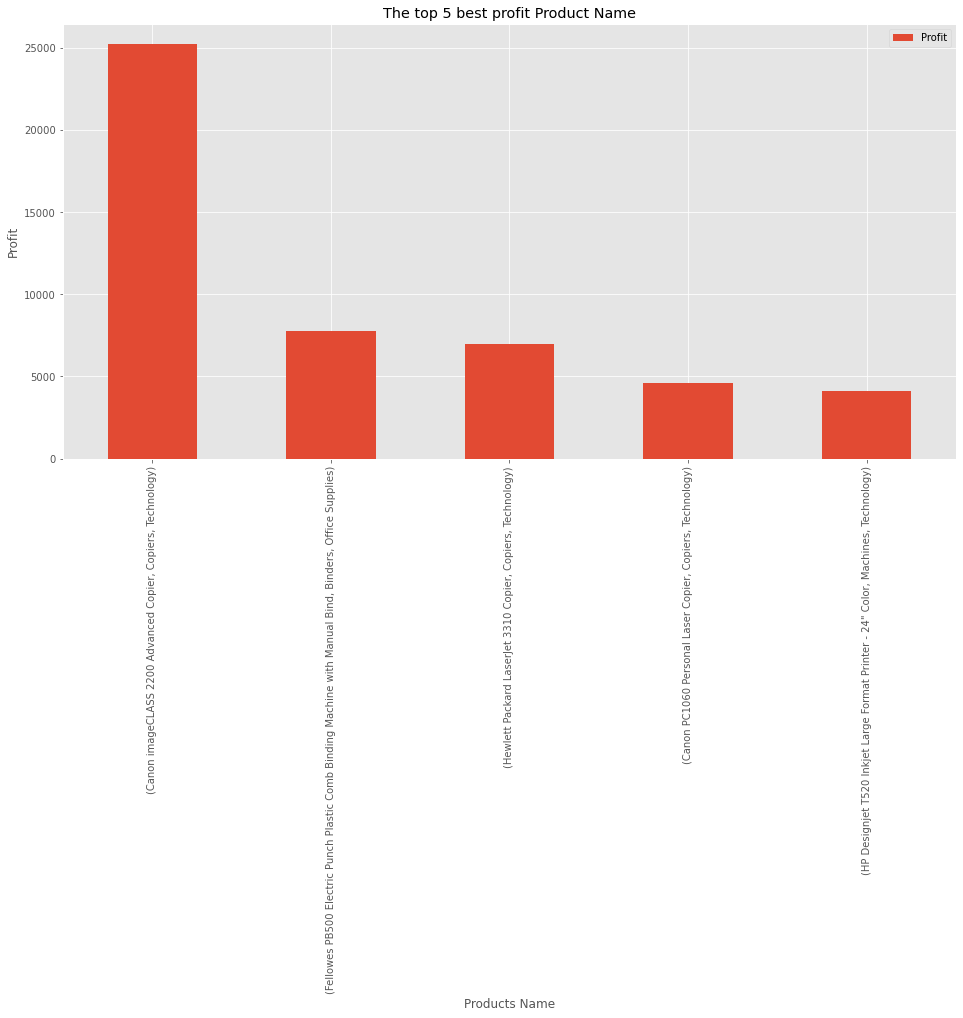

In [911]:
top_5_profit_prod_name.plot(kind = 'bar')
plt.title('The top 5 best profit Product Name')
plt.xlabel('Products Name')
plt.ylabel('Profit')
plt.xticks(rotation = 90)
plt.show()

In [1078]:
top_5_sales_prod_name.index == top_5_profit_prod_name.index

array([ True,  True, False, False, False])

**The best-selling does not necessarily mean that it is the most profitable or the most popular with customers**

The most popular products among customers

- Staple envelope

- Staples

- Easy-staple paper	

- Avery Non-Stick Binders	

- Staples in misc. colors	

while these are the best-selling products

- Canon imageCLASS 2200 Advanced Copier		

- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind	

- Cisco TelePresence System EX90 Videoconferencing Unit	

- HON 5400 Series Task Chairs for Big and Tall	

- GBC DocuBind TL300 Electric Binding System


and those are the most profitable products

- Canon imageCLASS 2200 Advanced Copier	

- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind	

- Hewlett Packard LaserJet 3310 Copier

- Canon PC1060 Personal Laser Copier	

- HP Designjet T520 Inkjet Large Format Printer - 24" Color	

### 1- Office Supplies seem to be the most popular with customers.This does not mean that it is the best-selling and profitable

## Sales & Profit

### Sales

In [912]:
df['Sales'].describe().round(2)

count     9994.00
mean       229.86
std        623.25
min          0.44
25%         17.28
50%         54.49
75%        209.94
max      22638.48
Name: Sales, dtype: float64

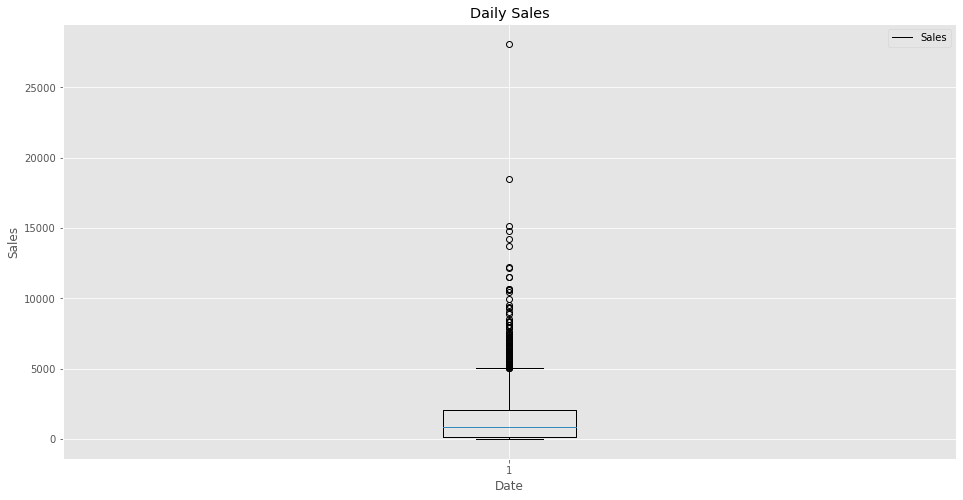

In [1034]:
plt.figure(figsize=(16,8))
daily_sales = df.groupby(['Order Date']).sum()
daily_sales = daily_sales.resample('D').sum() # D for Day
plt.boxplot(daily_sales['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Daily Sales")
plt.legend(['Sales'] , loc='upper right')
plt.show()

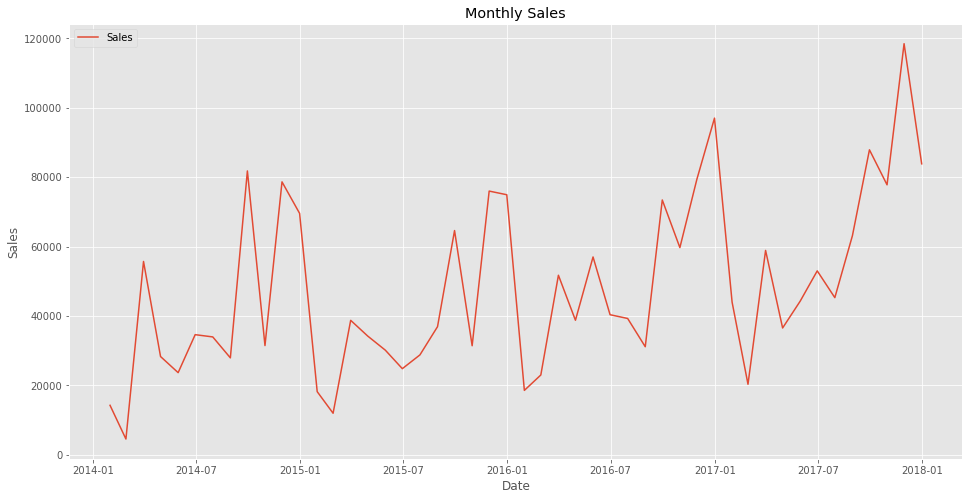

In [1029]:
plt.figure(figsize=(16,8))
monthly_sales = df.groupby(['Order Date']).sum()
monthly_sales = monthly_sales.resample('M').sum() # M for Month
plt.plot(monthly_sales['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Monthly Sales")
plt.legend(['Sales'] , loc='upper left')
plt.show()

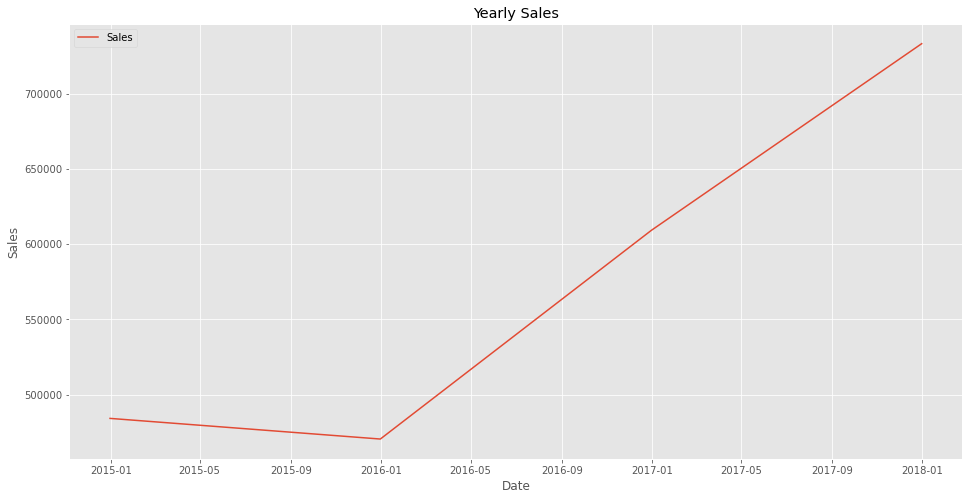

In [1030]:
plt.figure(figsize=(16,8))
yearly_sales = df.groupby(['Order Date']).sum()
yearly_sales = yearly_sales.resample('Y').sum() # Y for Year
plt.plot(yearly_sales['Sales']) 
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(['Sales'] , loc='upper left')
plt.title("Yearly Sales")
plt.show()

### Profit

In [57]:
df['Profit'].describe().round(2)

count    9994.00
mean       28.66
std       234.26
min     -6599.98
25%         1.73
50%         8.67
75%        29.36
max      8399.98
Name: Profit, dtype: float64

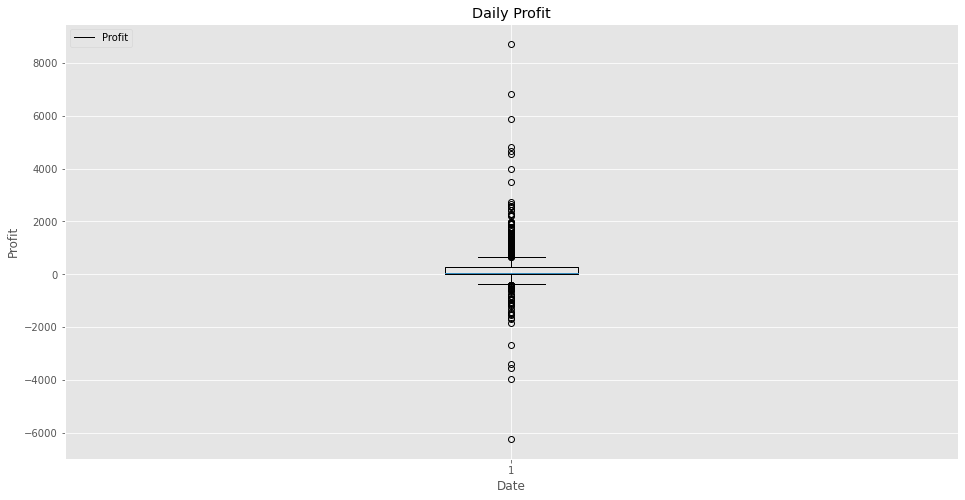

In [985]:
plt.figure(figsize=(16,8))
daily_Profit = df.groupby(['Order Date']).sum()
daily_Profit = daily_Profit.resample('D').sum() # D for Day
plt.boxplot(daily_Profit['Profit'])
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend(['Profit'] , loc='upper left')
plt.title("Daily Profit")
plt.show()

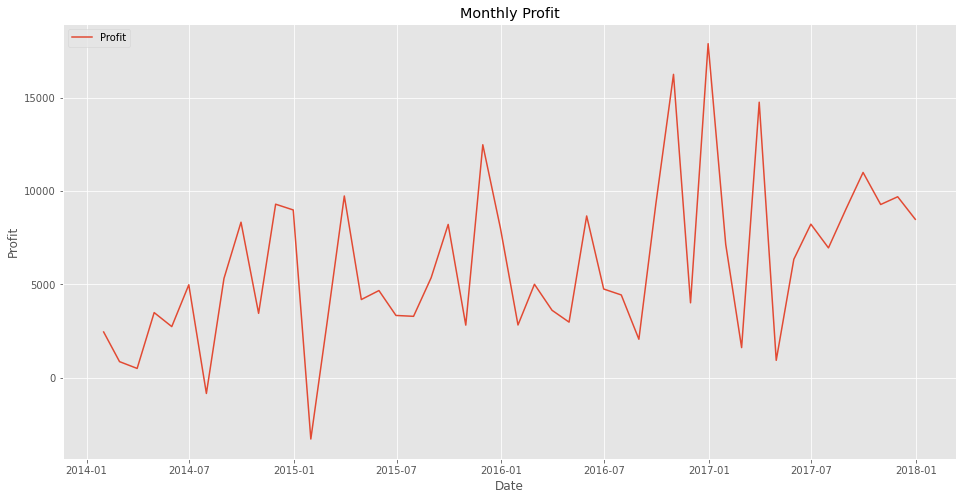

In [984]:
plt.figure(figsize=(16,8))
monthly_profit = df.groupby(['Order Date']).sum()
monthly_profit = monthly_profit.resample('M').sum() # M for Month
plt.plot(monthly_profit['Profit'])
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title("Monthly Profit")
plt.legend(['Profit'] , loc='upper left')
plt.show()

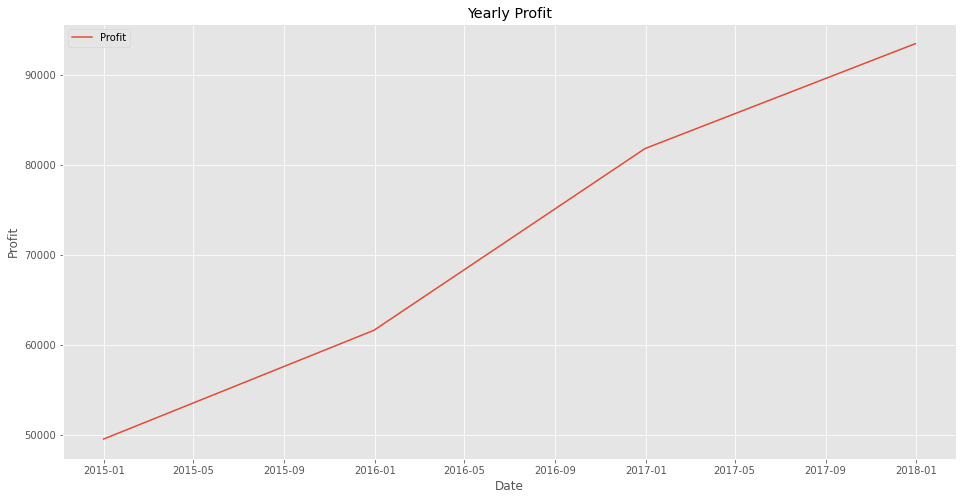

In [980]:
plt.figure(figsize=(16,8))
yearly_profit = df.groupby(['Order Date']).sum()
yearly_profit = yearly_profit.resample('Y').sum() # Y for Year
plt.plot(yearly_profit['Profit'])
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend(['Profit'])
plt.title("Yearly Profit")
plt.show()

### Quantity

In [40]:
df['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

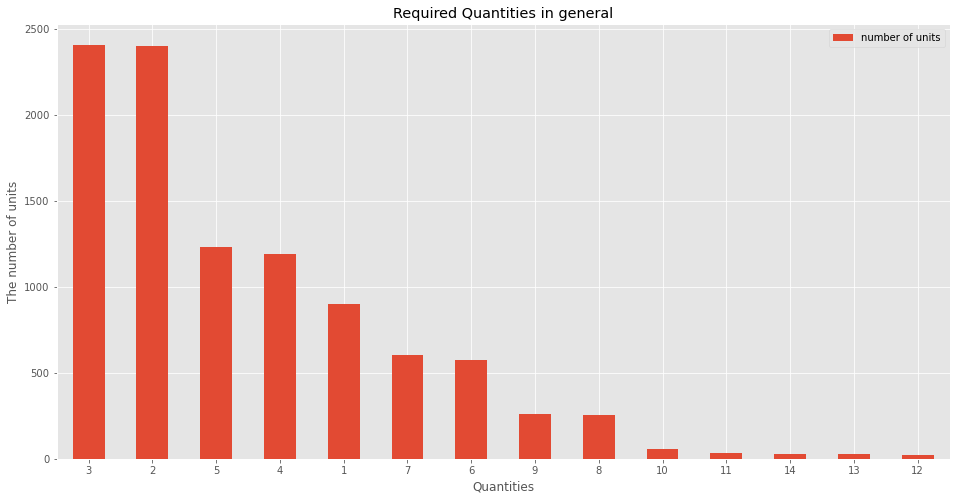

In [1008]:
plt.figure(figsize=(16,8))
df['Quantity'].value_counts().plot.bar()
plt.title('Required Quantities in general')
plt.xlabel('Quantities')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

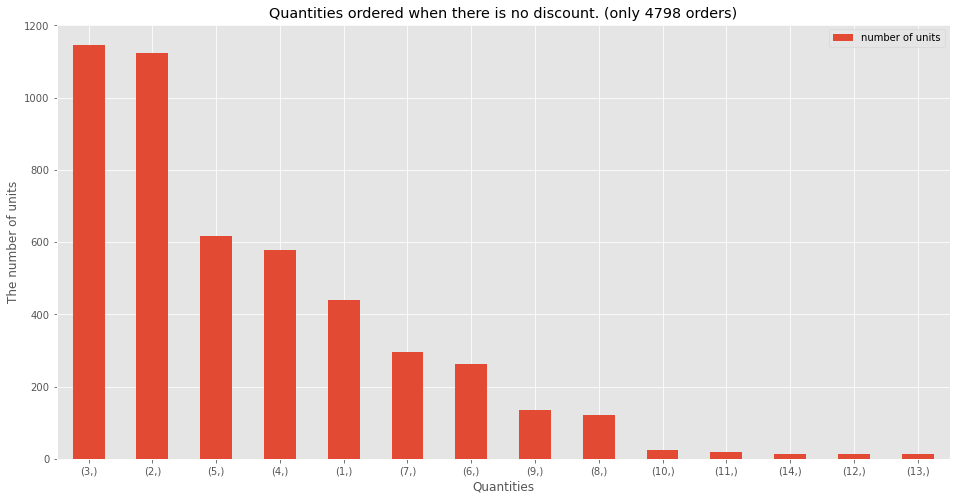

In [1041]:
df_quantity_non_discount = df[df['Discount'] == 0.0][['Quantity']]
plt.figure(figsize=(16,8))
df_quantity_non_discount.value_counts().plot.bar()
plt.title('Quantities ordered when there is no discount. (only 4798 orders)')
plt.xlabel('Quantities')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

In [976]:
len(df_quantity_non_discount)

4798

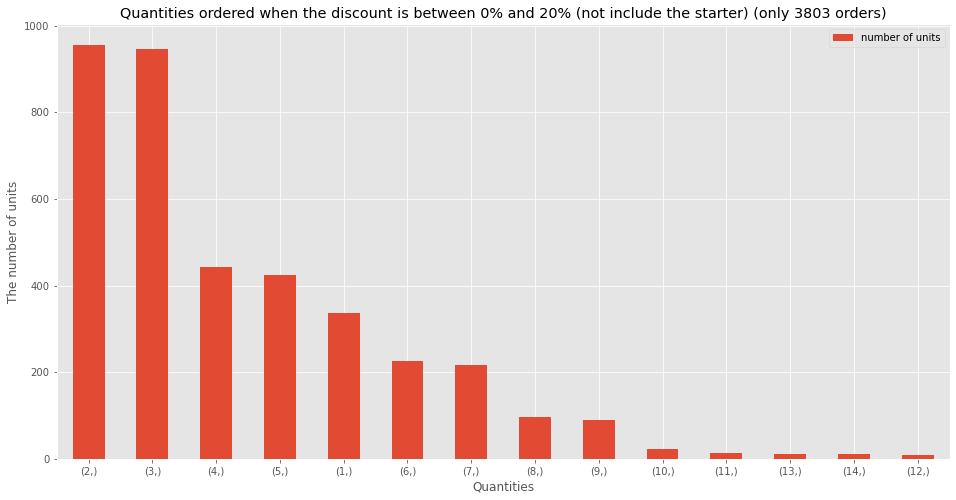

In [1042]:
df_quantity_small_discount = df[(df['Discount'] > 0.0) & (df['Discount'] <= 0.2)][['Quantity']]
plt.figure(figsize=(16,8))
df_quantity_small_discount.value_counts().plot.bar()
plt.title('Quantities ordered when the discount is between 0% and 20% (not include the starter) (only 3803 orders)')
plt.xlabel('Quantities')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

In [975]:
len(df_quantity_small_discount)

3803

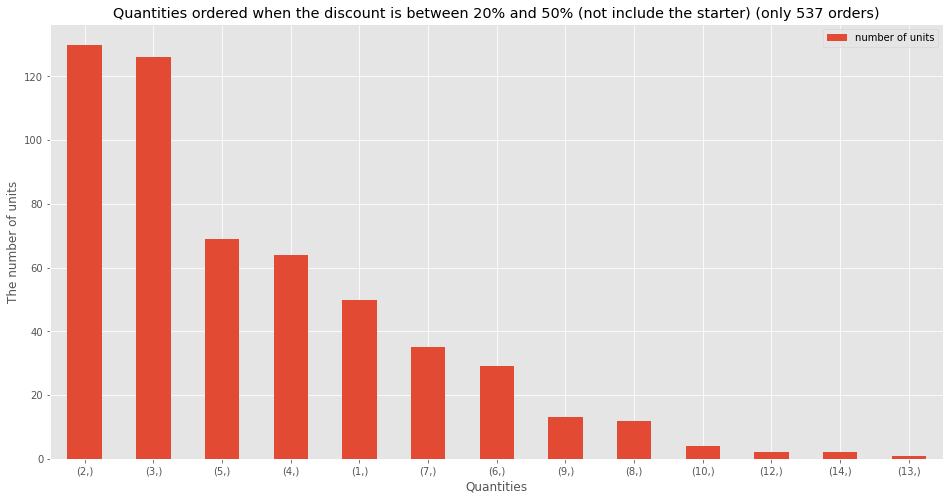

In [1043]:
df_quantity_meduim_discount = df[(df['Discount'] > 0.2) & (df['Discount'] <= 0.5)][['Quantity']]
plt.figure(figsize=(16,8))
df_quantity_meduim_discount.value_counts().plot.bar()
plt.title('Quantities ordered when the discount is between 20% and 50% (not include the starter) (only 537 orders)')
plt.xlabel('Quantities')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

In [977]:
len(df_quantity_meduim_discount)

537

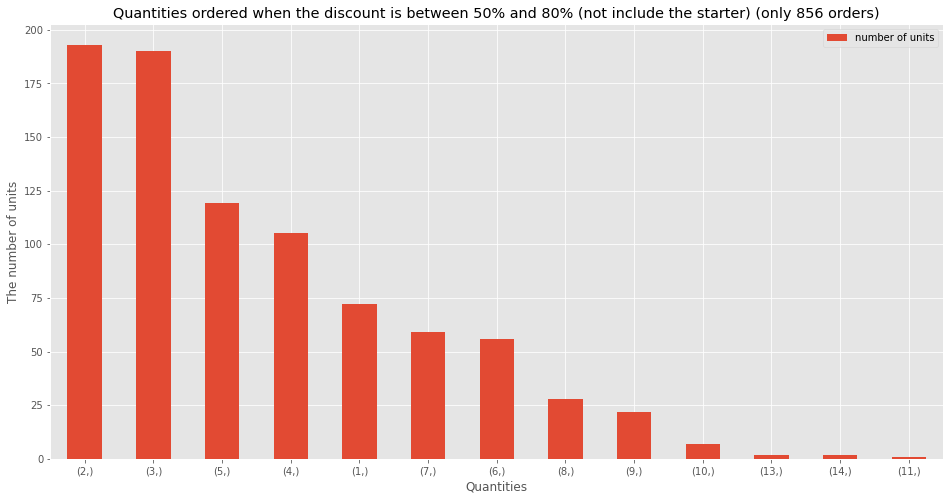

In [1044]:
df_quantity_large_discount = df[(df['Discount'] > 0.5) & (df['Discount'] <= 0.8)][['Quantity']]
plt.figure(figsize=(16,8))
df_quantity_large_discount.value_counts().plot.bar()
plt.title('Quantities ordered when the discount is between 50% and 80% (not include the starter) (only 856 orders)')
plt.xlabel('Quantities')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.show()

In [978]:
len(df_quantity_large_discount)

856

### Discount

In [399]:
np.sort(df['Discount'].unique())

array([0.  , 0.1 , 0.15, 0.2 , 0.3 , 0.32, 0.4 , 0.45, 0.5 , 0.6 , 0.7 ,
       0.8 ])

In [267]:
df['Discount'].describe().round(2)

count    9994.00
mean        0.16
std         0.21
min         0.00
25%         0.00
50%         0.20
75%         0.20
max         0.80
Name: Discount, dtype: float64

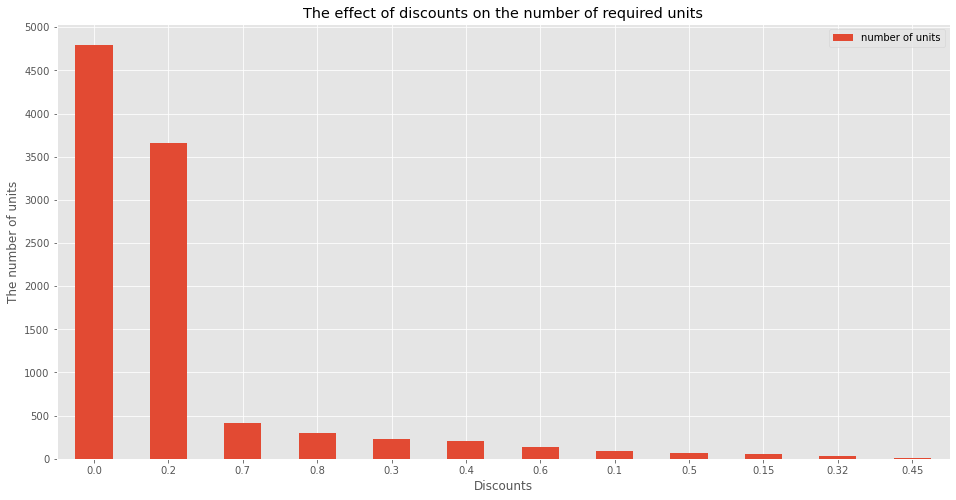

In [1056]:
plt.figure(figsize=(16,8))
df['Discount'].value_counts().plot.bar()
plt.title('The effect of discounts on the number of required units')
plt.xlabel('Discounts')
plt.ylabel('The number of units')
plt.legend(['number of units'])
plt.xticks(rotation = 360)
plt.yticks(np.arange(0,5500,500))
plt.show()

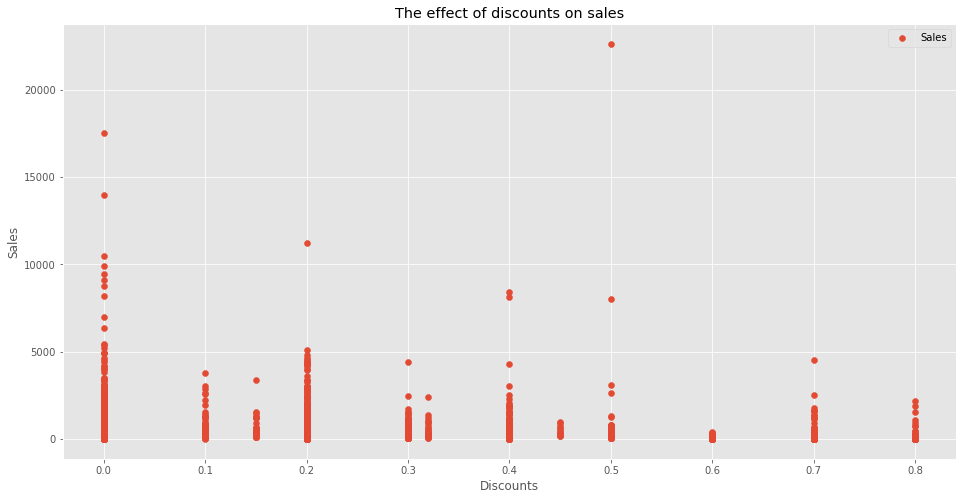

In [1059]:
plt.figure(figsize=(16,8))
plt.scatter(x= df['Discount'],  y = df['Sales'])
plt.title('The effect of discounts on sales')
plt.xlabel('Discounts')
plt.ylabel('Sales')
plt.legend(['Sales'])
plt.xticks(rotation = 360)
plt.show()

In [1062]:
discount_group_profit = df.groupby(['Discount']).sum()['Profit']
discount_group_profit

Discount
0.00    320987.6032
0.10      9029.1770
0.15      1418.9915
0.20     90337.3060
0.30    -10369.2774
0.32     -2391.1377
0.40    -23057.0504
0.45     -2493.1111
0.50    -20506.4281
0.60     -5944.6552
0.70    -40075.3569
0.80    -30539.0392
Name: Profit, dtype: float64

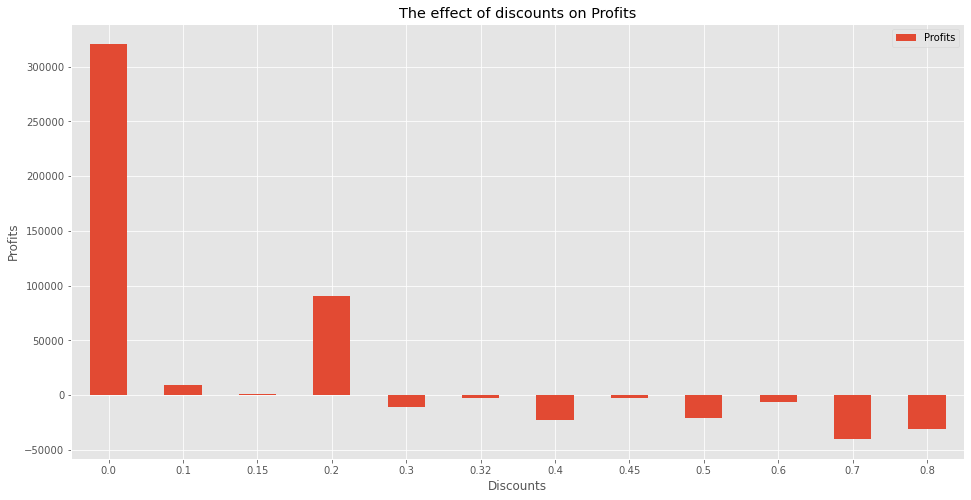

In [1063]:
plt.figure(figsize=(16,8))
discount_group_profit.plot(x= 'Discount',  y = 'Profit' , kind = 'bar')
plt.title('The effect of discounts on Profits')
plt.xlabel('Discounts')
plt.ylabel('Profits')
plt.legend(['Profits'])
plt.xticks(rotation = 360)
plt.show()

In [459]:
df_loss = df[df['Profit'] < 0.0]
df_loss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522


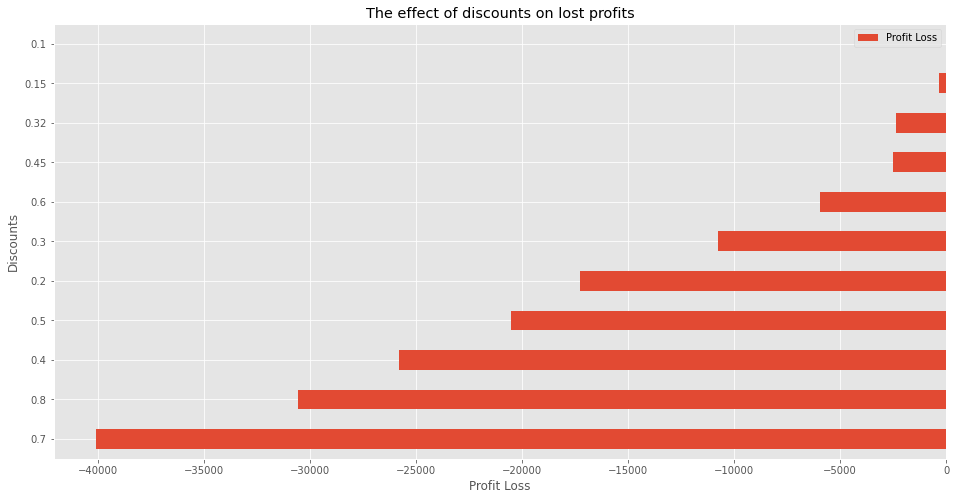

In [1067]:
discount_df_loss = df_loss.groupby(['Discount']).sum()['Profit']
discount_df_loss.sort_values().plot.barh()
plt.title('The effect of discounts on lost profits')
plt.xlabel('Profit Loss')
plt.ylabel('Discounts')
plt.legend(['Profit Loss'])
plt.show()

In [1144]:
df_loss.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6149,6150,CA-2017-101322,2017-12-28,2017-12-31,First Class,JG-15310,Jason Gross,Corporate,United States,Long Beach,California,90805,West,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,340.704,6,0.2,-34.0704
2051,2052,CA-2015-142237,2015-07-11,2015-07-13,First Class,CK-12595,Clytie Kelty,Consumer,United States,Philadelphia,Pennsylvania,19134,East,FUR-CH-10003833,Furniture,Chairs,Novimex Fabric Task Chair,341.488,8,0.3,-73.1760
1068,1069,US-2017-139955,2017-09-28,2017-09-30,Second Class,CM-12160,Charles McCrossin,Consumer,United States,Brownsville,Texas,78521,Central,OFF-SU-10001935,Office Supplies,Supplies,Staple remover,1.744,1,0.2,-0.3488
8124,8125,US-2017-150070,2017-09-07,2017-09-12,Standard Class,JA-15970,Joseph Airdo,Consumer,United States,Modesto,California,95351,West,FUR-CH-10004860,Furniture,Chairs,Global Low Back Tilter Chair,161.568,2,0.2,-28.2744
3156,3157,CA-2015-139584,2015-08-24,2015-08-28,Standard Class,EM-13810,Eleni McCrary,Corporate,United States,New York City,New York,10009,East,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,284.364,2,0.4,-75.8304


In [334]:
df_loss.shape

(1871, 21)